# Decomposing Audio Signals: Fourier Analysis

This section will introduce us to the world of **Fourier analysis**, which describes how general mathematical functions can be represented in terms of sinusoids. 
It will enable us to describe audio signals in terms of the pure tones of different frequencies.
Doing so will permit us to reenvision a temporal sequence of audio samples as a spectrum of audio frequencies that we can rank in terms of how prominent they are in the audio recording.
This will serve as a critical step-forward for us in our quest to write a computer program that can recognize different songs.

Our foray into Fourier (heh) will be split into two sections.
The present section will introduce us to **Fourier series** and the notion of representing a function as an infinite sum of sinusoids.
It sets the stage with some rich concepts and mathematics in preparation for the next section, which will introduce us to the **discrete Fourier transform (DFT)**.
The section on the DFT is where the rubber hits the road and we will finally learn how to perform Fourier analysis on actual data.  

## Some Preliminary Remarks About This Material

It must be noted that Fourier analysis is an area of mathematics whose application extends far beyond the annals of audio analysis.
While the foundations for these methods lie purely in the realm of mathematics, their validity does not depend on the nature of sound nor the physiology of hearing.
In fact, the methods of Fourier frequently play a starring role in areas of theoretical physics, signal processing, and other technical fields.
Hopefully the material provided here will serve as a starting point for the many exotic and rich pieces of mathematical analysis that lie in the reader's future.

We cannot afford to dive into the rigorous mathematical underpinnings of the Fourier series or the derivation of the discrete Fourier transform –
to do so would simply be beyond the depths of our goals in this course.
[Mark Newman's book Computational Physics](http://www-personal.umich.edu/~mejn/cp/) is a great resource that provides a more detailed derivation and treatment of discrete Fourier transforms and its variations.
It also contains excellent exercises that will enrich the reader's understanding of this material and its applications.

Jez Swanson's [Interactive Introduction to Fourier Transforms](http://www.jezzamon.com/fourier/) is also a wonderful resource that can help us enrich our understanding of Fourier analysis and its applications beyond audio analysis.
It is highly recommended that the reader take a moment to enjoy this fun and accessible introduction to Fourier analysis.

Finally, this material will be followed by several separate sections of exercises for the reader to complete.
This explains why this section might be somewhat sparse on reading comprehension questions;
it is strongly recommended that the reader completes these exercises to help "fully bake" the ideas presented here.

## Retracing Our Steps

We've embarked on quite the journey into the land of audio processing.
So far, we have distilled sound waves down to traveling fluctuations in air pressure, which vibrate one's eardrums in the same way that they vibrate the diaphragm of a microphone.
We saw that a dynamic microphone taps directly into a classical law of electricity and magnetism in order to couple these mechanical vibrations to oscillations of an electrical signal across a wire;
this marks the creation of an analog electrical signal that serves as a recording of the sound wave impinging on the microphone.
A method known as pulse code modulation (PCM) provided us with a simple recipe for digitizing this analog signal so that the analog recording can be stored on and processed by a digital computer.
It prescribed that we pick a sampling rate and a bit-depth with which we discretize our analog signal in time and amplitude, respectively, so that we can extract a sequence of audio samples that we encode as digital numbers on our computers.

At last, we have a digital audio file in our possession, which serves as a recording of the cascades of colliding air molecules that were crashing against our microphone
(of course, the fidelity of this recording is limited by the quality of the materials in our microphone, and by how stingy we were with the bit-depth and sampling rate that we allotted in the digitization process).
Keeping in mind our overarching goal – creating a song-recognition app – perhaps now we can visualize some of our digital recordings and get some ideas about how we can pick out distinguishing qualities between songs.

This will work, right? ... Right!?

## A Cacophony of Data: The Need for Frequency Decomposition

The following plot displays the temporal waveform for a trumpet playing a chord for roughly $2.5\;\mathrm{seconds}$.

This is... a total mess.
Despite all of our hard work to understand the nature of sound waves, and to record them, we can't seem to glean much information from our audio data at all.
We can certainly identify how long the recording lasted for; that much is trivial.
We are also able to see any gross changes in volume during the recording.
That being said, we certainly cannot distill what *notes* are being played during the recording.

Fortunately, we will soon find that this data is far from useless, and that we simply need the right mathematical tools to make sense of it.
As promised at the outset of this section, we will learn how to *transform* this waveform into the **Fourier spectrum** depicted below.
If we are to think of the trumpet's sound wave as a [superposition](https://rsokl.github.io/CogWeb/Audio/physics-of-sound.html#Realistic-Sounds-and-the-Principle-of-Superposition) of [pure tones](https://rsokl.github.io/CogWeb/Audio/physics-of-sound.html#Quantifying-Sound:-Pure-Tones) of different frequencies, then this spectrum shows us the pure-tone frequencies that are the most prominent in this sound wave.

The Fourier spectrum is meant to be read like a histogram: the $x$-axis carries a sequence of ascending of frequency values and the height of a vertical column indicates the relative strength of that frequency-component in the audio clip being analyzed.
We will soon see the precise meaning of the quantity plotted on the $y$-axis, the **Fourier coefficient**: $|a_{k}|$.

<div class="alert alert-info">

**Reading Comprehension: Reading a Fourier Spectrum**:

According to the Fourier spectrum for the trumpet depicted above, what are the frequencies of the four most prominent notes in the audio recording?
Estimate these values to 2 significant figures.
</div>

The Fourier spectrum gives us insight into what an audio recording sounds like, because the human ear itself performs a "frequency decomposition" when sending auditory signals to the brain.
Within the the inner ear, the cochlea contains a spiraling ramp of hair cells, which respond mechanically to vibrations in ear fluid.
The hair cells near the beginning of this "ramp" respond to high-frequency vibrations (up to roughly $20,000\;\mathrm{Hz}$), and as one marches along the ramp the hair cells resonate to progressively lower frequency vibrations (down to $20\;\mathrm{Hz}$).
The following video provides a nice summary of this physiology.

## Fourier Series

A **Fourier series** is a representation of a function defined on a restricted domain by a sum over an infinite number of weighted sinusoidal functions.
Given a function $f(t)$ defined on a domain $[0, T)$ (the square bracket indicates that $0$ is included in the domain, whereas the rounded bracket indicates that $T$ is not included), we can represent that function on that domain using a Fourier series:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty}{a_{k}\cos\bigg(2\pi\frac{k}{T}t - \varphi_k\bigg)};\; t \in [0, T)
\end{equation}

For instance, this means that we could take $f(t)=e^t$, with $t \in [0, 10)$, and represent in terms of sinusoids via a Fourier series;
to do so, we need to find appropriate values for $(a_k)_{k=0}^{\infty}$ and $(\varphi_k)_{k=1}^{\infty}$, particular to $e^t$ with $t \in [0, 10)$.


See that **the** $k^\textbf{th}$ **term in this series is a cosine function that oscillates with a frequency** $\nu_k = \frac{k}{T}$, and thus each term in the series oscillates with an increasing frequency as one progresses "deeper" into the series.
The above equation says that, by adding an infinite number of cosine functions with frequencies of $\frac{1}{T}, \frac{2}{T}, \dots$, using some combination of respective phases ($\varphi_k$) and amplitudes ($a_k$), we can *exactly* represent $f(t)$ on $t \in [0, T)$.
Note that the term $\frac{a_0}{2}$ can be thought of as a cosine wave with a frequency $\frac{0}{T}$, which is just a constant value. For our purposes, we will assume that $t$, and every amplitude ($a_k$) and phase ($\varphi_k$), are real-valued numbers (i.e. all $t, (a_k)_{k=0}^{\infty}, (\varphi_k)_{k=1}^{\infty}, f(t) \in \mathbb{R}$).


Thus, in order to represent a function using a Fourier series, *one must find the appropriate values for* $(a_k)_{k=0}^{\infty}$ *and* $(\varphi_k)_{k=1}^{\infty}$ *for that function*.
Once we compute these values, plotting $|a_k|$ vs $\frac{k}{T}$ would reveal the **Fourier spectrum** for this function.
$|a_k|$ is often referred to as a **Fourier coefficient**, and, as already established, $\frac{k}{T}$ is the frequency ($\nu_k$) associated with that coefficient.  


Tying this introduction to Fourier series back to our discussion of audio analysis, we can think of $f(t)$ as any analog audio signal that was recorded by a microphone for the span of time $T$.
It follows that if we were to find the appropriate values of $(a_k)_{k=0}^{\infty}$ and $(\varphi_k)_{k=1}^{\infty}$ to represent this analog signal using a Fourier series, then we would have successfully represented our analog signal as a superposition of an infinite number of pure tones, where the $k^\text{th}$ pure tone has a frequency of $\frac{k}{T}$ and an amplitude of $a_k$.
The relative sizes of $(a_k)_{k=0}^{\infty}$ tell us how prominently "featured" each pure tone is in the constitution of that analog audio signal; 
we can summarize this information by plotting its Fourier spectrum: $|a_k|$ vs $\frac{k}{T}$.

<div class="alert alert-warning">

**Looking Ahead:**
    
We will not be learning how to solve for $(a_k)_{k=0}^{\infty}$ and $(\varphi_k)_{k=1}^{\infty}$ for an infinite Fourier series – doing so would require too much mathematical sophistication, and it would not help us analyze actual audio data.
Instead, we will be tackling a restricted version of this problem.

Rather than representing a continuous function $f(t)$ using an infinite sum of sinusoids (i.e. a Fourier series), we will learn to represent a *finite* sequence of values, $f(t_0), \dots, f(t_{N-1})$, using a *finite* sum of sinusoids whose parameters's values, $(a_k)_{k=0}^{\left\lfloor\frac{N}{2}\right\rfloor}$ and $(\varphi_k)_{k=1}^{\left\lfloor\frac{N}{2}\right\rfloor}$, we must find.
The **discrete Fourier transform**, which is introduced in the next section of the course, will enable us to compute these values so that we can transform our audio samples into a spectrum of frequency components.

</div>


<div class="alert alert-info">

**Reading Comprehension: It's Just a Phase**

In the function signature $\cos(t - \varphi)$, $\varphi$ is known as the "phase shift".
If you are not familiar with the concept of phase shifts, see that $\varphi$ can effectively "shift" the cosine's waveform along the $t$ axis; try plotting $\cos(t - \varphi)$ for various values of $\varphi$ to see its effect.
Start off with multiples of $\frac{\pi}{2}$; then try other values.

In which direction, towards $-t$ or $+t$, does the waveform move when you increase $\varphi$?
What is the smallest value of $\varphi$ for which $\cos(t - \varphi) = \sin(t)$?
</div>

<div class="alert alert-info">

**Reading Comprehension: "Fourier, Fourier, Fourier", You Sound Like a Broken Record**

A function $g(t)$ that is periodic with a period of $T$ satisfies the relationship $g(t+T) = g(t)$ for any $t$.
Show that the Fourier series representation of any function on $t \in [0, T)$ is periodic with a period of $T$.
</div>

<div class="alert alert-info">

**Reading Comprehension: Other Series Representations of Functions**

The notion of representing functions in terms of sums of other functions can be surprising at first blush, and Fourier series are not the only shape-shifting series out there.
A Taylor series uses an infinite sum of polynomials to represent a function.
This can be used to produce a "leading order" polynomial approximation for a function in calculations.

The Taylor series representation for $\sin(x)$, centered about $x=0$ is:
    
\begin{equation}
\sin(x) = \sum_{n=0}^{\infty}{\frac{(-1)^n}{(2n+1)!}x^{2n+1}}
\end{equation}

Note that this infinite sum is an *exact* representation of $\sin(x)$ for all $x \in \mathbb{R}$.
    
Plot $\sin(x)$ on $x \in [-2\pi, 2\pi]$ and then plot the Taylor series representation of $\sin(x)$ up to (and including) the 11th order term in the polynomial (i.e. $n=5$) and appreciate how well this truncated series approximates $\sin(x)$ within $|x|< \pi$.
Try including higher-order terms from the Taylor series.
Does this improve the approximation?

If you want to replace $\sin(x)$ when $x\approx 0$ with a simple approximation, what is the best first-order (degree-$1$) polynomial approximation that you could use?
</div>

<div class="alert alert-warning">

**Some Mathematical Details**:
    
Fourier series can be used to represent a very broad class of functions, but we cannot represent $f(t)$ with a Fourier series if $f(t)$ is unbounded (goes to positive or negative infinity) on the prescribed domain, or if $f(t)$ has infinitely many discontinuities within the domain.
There are many [additional details to discuss regarding series convergence](https://en.wikipedia.org/wiki/Fourier_series#Convergence), but they are not appropriate for our discussion.

An additional note: although we use the symbols $f(t)$ and $T$ to describe the Fourier series in a way that conjures up our discussion of time, temporal audio waveforms, and analog signals, it is critical to keep in mind that the underpinnings of a Fourier series are solely those of mathematics; it is not a result of physics, but rather is a tool that can be used to describe physics.   
</div>



### A Simple Example with a Truncated Fourier Series

Let's ground this introduction to Fourier series in an example; after all, it is quite surprising to think that we can add a bunch of sinusoids together to produce non-sinusoidal functions, like, say, a polynomial.
Suppose we want to represent the function $f(t) = t^3$ on the domain $[0, 3)$ using a Fourier series.
Since it can be hard to wrap one's mind around the idea of summing an infinity of cosines together, let's see that summing just a few sinusoids together can yield something that roughly matches this function.
Once again, note that we have not discussed _how_ we find the proper values for $(a_k)_{k=0}^{\infty}$ and phases $(\varphi_k)_{k=1}^{\infty}$; 
this example simply assumes that we have access to these quantities.

The following plot shows the contributions of the first four terms in the Fourier series for  $f(t) = t^3$ on $t \in [0, 3)$, which are roughly


\begin{equation}
t^3 \approx 6.7 + 8.4 \cos\bigg(2\pi\cdot\frac{1}{3}t - (-1.1)\bigg) + 4.3\cos\bigg(2\pi\cdot\frac{2}{3}t - (-1.3)\bigg) + 2.1\cos\bigg(2\pi\cdot\frac{3}{3}t - (-1.4)\bigg);\; t \in [0, 3)
\end{equation}


While it is a stretch to call that wobbly blue noodle an "approximation" of $t^3$, the combination of these four terms does roughly follow the trend of this curve within the interval $t \in [0, 3)$.
The $k=1$ term, which oscillates with a frequency of $1/3$, is the most prominent contributor to this four-term sum: its amplitude is double that of the $k=2$ term, which oscillates with a frequency of $2/3$, and is nearly quadruple that of the $k=3$ term. 

Adding more terms from the series will improve this approximation.
Indeed, if we include $500$ terms from the Fourier series, it fits $f(t) = t^3$ on $t \in [0, 3)$ very closely!

The amplitudes and phases of these sinusoids, which oscillate with the respective frequencies $\frac{0}{T}, \frac{1}{T}, \frac{2}{T}, \dots, \frac{499}{T}$, have been carefully selected so that the sinusoids smooth one another out when added together and cooperate to approximate $t^3$.
Thus, we need not rely on the concept of infinity to begin to understand how Fourier series work.

Plotting $|a_k|$ vs $\frac{k}{T}$ reveals the Fourier spectrum for this function.

Study this plot and read off the values for $|a_0|,\;|a_1|,\;|a_2|,\;|a_4|,\;$ and see that they match the amplitudes from the four-term truncated Fourier series written above.  

### Reformulating the Fourier Series Using Euler's Formula

> This subsection contains a derivation that requires a substantial amount of comfort with complex numbers: do not worry if you don't follow all of this. Feel free to just skim it.

A common strategy for working with Fourier series, and one that is essential to presenting the standard formulation for the discrete Fourier transform, is to rewrite the sinusoids in terms of complex-valued exponentials via Euler's formula

\begin{equation}
e^{ix} = \cos(x) + i\sin(x)
\end{equation}

We do this because it is often much easier to deal with exponentials rather than sinusoids:
the trigonometric identities that we memorize (or repeatedly look up in tables) become self-evident thanks to the simple rules of multiplication (i.e. $e^xe^y = e^{x+y}$) and exponentiation (i.e. $(e^x)^a = e^{ax}$) that are obeyed by exponentials.
Review the section on [Complex Numbers](https://rsokl.github.io/CogWeb/Math_Materials/ComplexNumbers.html) if you need a refresher.

Based on Euler's formula, see that we can rewrite cosine as $\cos{x} = \frac{1}{2}(e^{ix} + e^{-ix})$.
Thus we can rewrite the terms of our Fourier series as:

\begin{align}
\frac{a_0}{2} + \sum_{k=1}^{\infty}{a_{k}\cos\bigg(2\pi\frac{k}{T}t - \varphi_k\bigg)} & = \frac{a_0}{2} + \sum_{k=1}^{\infty}{\frac{a_{k}}{2}\Big(e^{i\left(2\pi\frac{k}{T}t - \varphi_k\right)} + e^{-i\left(2\pi\frac{k}{T}t - \varphi_k\right)}\Big)} \\
& = \frac{a_0}{2} + \sum_{k=1}^{\infty}{\frac{a_{k}}{2}\Big(e^{i\left(2\pi\frac{k}{T}t - \varphi_k\right)}\Big)} + \sum_{k=1}^{\infty}{\frac{a_{k}}{2}\Big(e^{-i\left(2\pi\frac{k}{T}t - \varphi_k\right)}\Big)} \\
& = \frac{|a_0|}{2}e^{- i\varphi'_0} + \sum_{k=1}^{\infty}{\frac{|a_{k}|}{2}e^{- i\varphi'_k}e^{i 2\pi\frac{k}{T}t}} + \sum_{k=1}^{\infty}{\frac{|a_{k}|}{2}e^{i\varphi'_k}e^{i 2\pi\frac{-k}{T}t}} \\
& = c_0 + \sum_{k=1}^{\infty}{c_{k}e^{i 2\pi\frac{k}{T}t}} + \sum_{k=1}^{\infty}{c^{*}_{k}e^{i 2\pi\frac{-k}{T}t}} \\
& = c_0 + \sum_{k=1}^{\infty}{c_{k}e^{i 2\pi\frac{k}{T}t}} + \sum_{k=-\infty}^{-1}{c_{k}e^{i 2\pi\frac{k}{T}t}} \\
& = \sum_{k=-\infty}^{\infty}{c_{k}e^{i 2\pi\frac{k}{T}t}}
\end{align}

where we have defined the **complex-valued Fourier coefficients**

\begin{equation}
c_k \triangleq \left\{
\begin{array}{lll}
\tfrac{|a_k|}{2} e^{-i \varphi'_k}, \quad & k \geq 0\\
c_{|k|}^{*}, \quad & k < 0
\end{array}\right.
\end{equation}

Note the relationship $c_k = c_{-k}^*$ for $k \neq 0$, where ${}^*$ denotes complex conjugation.
Thus if $c_{k_o}$ is some number $a + bi$, then $c_{-k_o} = c^*_{k_o} = a - bi$.
We also introduce $\varphi'_k$ to "absorb" the sign of $a_k$ into $\varphi_k$, so that we need only work with $|a_k|$.
In other words, since $e^{i0}=1$ and $e^{i\pi}=-1$, we have that $\varphi_k'=\varphi_k$ if $a_k$ is positive, while $\varphi_k'=\varphi_k+\pi$ if $a_k$ is negative.

Thus we can rewrite our Fourier series, $f(t)$ on $t \in [0, T)$ as an infinite sum of weighted complex-valued exponentials:

\begin{equation}
f(t) = \sum_{k=-\infty}^{\infty}{c_{k}e^{i 2\pi\frac{k}{T}t}};\; t \in [0, T)
\end{equation}

Given our above definition for $c_k$, see that this form of the Fourier series is *equivalent to the series involving real-valued sinusoids*.
That is, despite the fact that we are now dealing with complex values, this sum will always resolve to produce a purely real-valued $f(t)$.

We can easily recover the familiar sinusoidal terms from these complex-valued coefficients.
Given the complex-valued number $c_k = a + bi$, we can recover the amplitude and phase of the sinusoid that oscillates with frequency $\frac{k}{T}$:

\begin{equation}
|a_k| = 2|c_k| = 2\sqrt{a^2 + b^2}\\
\varphi'_k = \arctan_2(-b,a)
\end{equation}

and with these in hand, we have

\begin{equation}
|a_k|\cos{\bigg(2\pi\frac{k}{T}t - \varphi'_k\bigg)} = a_k\cos{\bigg(2\pi\frac{k}{T}t - \varphi_k\bigg)}
\end{equation}

<div class="alert alert-info">

**Reading Comprehension: Don't Let the Real World Pass You By**

Consider the first three coefficients for the complex-valued Fourier series of $t^3$, for $t \in [0, 3)$:
    
\begin{align}
\frac{a_0}{2} & = 6.7\\
c_1 & = 2.04 + i\: 3.64\\
c_2 & = 0.50 + i\: 2.07\\    
\end{align}

In Python, plot each of the corresponding real-valued sinusoids and their sum, along with $t^3$, for $t \in [0, 3)$
</div>

## Summary

The **Fourier series** enables us to represent a function $f(t)$ as an infinite sum of weighted sinusoids.
The series can be written in terms of real-valued sinusoids, but it is also convenient to write it in terms of complex-valued exponentials (by leveraging Euler's formula: $e^{ix} = \cos(x) + i\sin(x)$)
    
\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty}{a_{k}\cos\bigg(2\pi\frac{k}{T}t - \varphi_k\bigg)} = \sum_{k=-\infty}^{\infty}{c_{k}e^{i 2\pi\frac{k}{T}t}};\; t \in [0, T)
\end{equation}

Here $e^{i 2\pi\frac{k}{T}t}$ is a complex-valued sinusoid that oscillates with a frequency $\frac{k}{T}$, and 
$c_k$ is its associated complex-valued coefficient.
Both $|c_k|$ and $|a_k|$ are referred to as **Fourier coefficients** (they are intimately coupled by the relation $|a_k| = 2|c_k|$ for $k \geq 0$).
Assuming that $f(t)$ is a real-valued function, the sum of all of these complex-valued terms *will produce a real-valued output*; i.e. all of the imaginary parts in the sum will cancel one another out.
    
If you have the number $c_k = a + bi$ in hand, then the amplitude and phase-shift for the real-valued sinusoid that oscillates with frequency $\frac{k}{T}$ can be recovered with ease using the relationships

\begin{equation}
|a_k| = 2|c_k| = 2\sqrt{a^2 + b^2}\\
\varphi'_k = \arctan_2(-b,a)
\end{equation}

for $0 \leq k$.
Having computed the sinusoid's amplitude and phase, the real-valued sinusoid is recovered:

\begin{equation}
|a_k|\cos{\bigg(2\pi\frac{k}{T}t - \varphi'_k\bigg)} = a_k\cos{\bigg(2\pi\frac{k}{T}t - \varphi_k\bigg)}
\end{equation}
    
The value of $|a_k|$ (which is proportional to $|c_k|$) provides us with a measure of how "prominent" the sinusoid of frequency $\nu_k = \frac{k}{T}$ is in the representation of $f(t)$ on $t \in [0, T)$.
In terms of audio analysis, this permits us to decompose an audio signal in terms of important pure tones.
Plotting $|a_k|$ versus $\frac{k}{T}$ displays the so-called **Fourier spectrum** for $f(t)$.

Note that we have not actually learned how to compute $(c_k)_{k=-\infty}^{\infty}$ in this section.
We will learn how to do this for a restricted version of this problem, via the discrete Fourier transform.

## Reading Comprehension Exercise Solutions

**Reading a Fourier Spectrum: Solution**


According to the Fourier spectrum for the trumpet, depicted above, what are the frequencies of the four most prominent notes in the audio recording?
Estimate these values to 2 significant figures.

> The four tallest peaks in the Fourier spectrum correspond to the four "most prominent" notes.
> These reside at (approximately) $510\;\mathrm{Hz}$, $1000\;\mathrm{Hz}$, $1500\;\mathrm{Hz}$, and $2100\;\mathrm{Hz}$

**It's Just a Phase: Solution**

In the function signature $\cos(t - \varphi)$, $\varphi$ is known as the "phase shift".
If you are not familiar with the concept of phase shifts, see that $\varphi$ can effectively "shift" the cosine's waveform along the $t$ axis; try plotting $\cos(t - \varphi)$ for various values of $\varphi$ to see its effect.

In which direction, towards $-t$ or $+t$, does the waveform move when you increase $\varphi$?
What is the smallest value of $\varphi$ for which $\cos(t - \varphi) = \sin(t)$?

>Any function of the form $f(t - \varphi)$ gets shifted to further to the right (towards $+t$) with increasing values of $\varphi$, as illustrated below.
Since $\sin(t)$ is "to the right" of $\cos(t)$ by an amount $\frac{\pi}{^2}$, then $\cos(t - \frac{\pi}{^2}) = \sin(t)$.

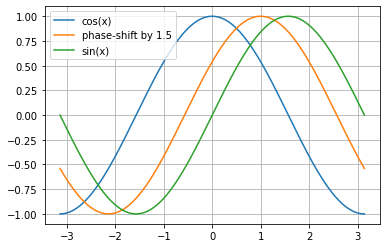

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 1000)
ax.plot(x, np.cos(x), label="cos(x)")
ax.plot(x, np.cos(x - 1.), label="phase-shift by 1.5")
ax.plot(x, np.sin(x), label="sin(x)")
ax.grid(True)
ax.legend()

**Fourier, Fourier, Fourier; You Sound Like a Broken Record: Solution**

A function $g(t)$ that is periodic with a period of $T$ satisfies the relationship $g(t+T) = g(t)$ for any $t$.
Show that the Fourier series representation of any function on $t \in [0, T)$ is periodic with a period of $T$

>Note that that $x \in \mathbb{Z}$ means that $x$ is any integer.

>Since $\cos\big(2\pi\frac{k}{T}(t + T) - \varphi_k\big) = \cos\big(2\pi\frac{k}{T}t - \varphi_k + 2\pi k\big) = \cos\big(2\pi\frac{k}{T}t - \varphi_k\big)$ for $k \in \mathbb{Z}$, we see that each term in the Fourier series is periodic.
Since each term satisfies the relation $f(t+T) = f(t)$, it is clear that $f(t + T) = f(t)$ for any Fourier series defined on $t \in [0, T)$.
Thus any function represented by a Fourier series on this domain will repeat itself within each window $t \in [nT, (n+1)T)$, where $n \in \mathbb{Z}$.

**Other Series Representations of Functions: Solution**

The Taylor series representation for $\sin(x)$, centered about $x=0$ is:
    
\begin{equation}
\sin(x) = \sum_{n=0}^{\infty}{\frac{(-1)^n}{(2n+1)!}x^{2n+1}}
\end{equation}
    
Plot $\sin(x)$ on $x \in [-2\pi, 2\pi]$ and then plot the Taylor series representation of $\sin(x)$ up to (and including) the 11th order term in the polynomial (i.e. $n=5$). 

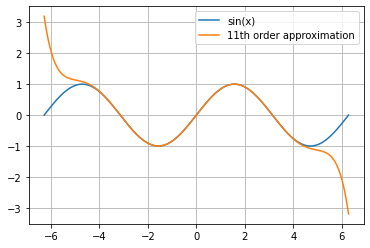

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from math import factorial


def sine_taylor(max_n: int, x: np.ndarray) -> np.ndarray:
    return sum(
        (-1) ** n / factorial(2 * n + 1) * x ** (2 * n + 1) for n in range(max_n + 1)
    )



fig, ax = plt.subplots()
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
ax.plot(x, np.sin(x), label="sin(x)")
ax.plot(x, sine_taylor(5, x), label="11th order approximation")
ax.grid(True)
ax.legend()

If you want to replace $\sin(x)$ when $x\approx 0$ with a simple approximation, what is the best first-order (degree-$1$) polynomial approximation that you could use?

>According to the Taylor series approximation for $\sin(x)$ around $x=0$, the $n=0$ term produces a first-order approximation to $\sin(x)$:
\begin{equation}
\frac{(-1)^0}{(2(0)+1)!}x^{2(0)+1} = x
\end{equation}

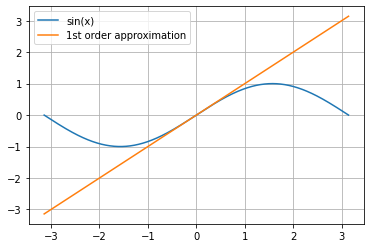

In [3]:
fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 1000)
ax.plot(x, np.sin(x), label="sin(x)")
ax.plot(x, sine_taylor(0, x), label="1st order approximation")
ax.grid(True)
ax.legend()

**Don't Let the Real World Pass You By: Solution**


Given the first three coefficients for the complex-valued Fourier series of $t^3$, for $t \in [0, 3)$:
    
\begin{align}
\frac{a_0}{2} & = 6.7\\
c_1 & = 2.04 + i\; 3.64\\
c_2 & = 0.50 + i\; 2.07\\    
\end{align}

In Python, plot the corresponding real-valued sinusoids and their sum along with $t^3$, for $t \in [0, 3)$

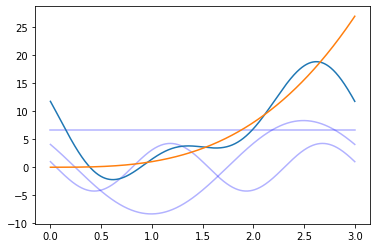

In [4]:
a0 = 6.7
coeffs = np.array([2.04 + 3.64j, 0.50 + 2.07j])

# using the relationships between c_k and a_k, phi_k
amps = 2 * np.abs(coeffs)
phases = np.arctan2(-coeffs.imag, coeffs.real)

T = 3
t = np.linspace(0, T, 1000)

# holds each of the first three terms of the Fourier
# series evaluated at `t`
terms = [np.full_like(t, fill_value=a0)] + [
    amp * np.cos(2 * np.pi * (k / T) * t - phase)
    for k, amp, phase in zip(range(1, 3), amps, phases)
]


fig, ax = plt.subplots()

# plot each term
for term in terms:
    ax.plot(t, term, color="blue", alpha=0.3)

ax.plot(t, sum(terms))
ax.plot(t, t ** 3)

## Code for Reproducing Figures

### Plotting the Top-n Fourier Components

```python
import numpy as np
import matplotlib.pyplot as plt

def get_fourier_components(
    func, num_samples, domain_length, sort_by_descending_magnitude=False
):
    """
    Returns the N // 2 + 1 amplitude-phase terms of the inverse-DFT series 
    of func(t), where funct t is evaluated on [0, T) in N evenly-spaced points.
    I.e each component
    
                     A[k] cos(2*pi * f[k] * t + phi[k])
    
    is returned in a 2D array for each frequency component and each time.
    
    Parameters
    ----------
    func : Callable[[numpy.ndarray], numpy.ndarray]
        A vectorized function whose fourier components are being evaluated
    
    num_samples : int
        The number of samples used, N
    
    domain_length : float
        The upper bound, T, on the sampling domain: [0, T)
    
    sort_by_descending_magnitude : bool, default=False
        If True, the components are returned in order of decreasing amplitude
    
    Returns
    -------
    numpy.ndarray, shape-(N // 2 + 1, N)
        Axis-0 carries the respective fourier components. I.e. element-k returns
        the shape-(N,) array vectorized over times:
                       A[k] cos(2*pi * f[k] * t + phi[k])   (where t is shape-(N,))
        Thus calling `out.sum(axis=0)` on the output returns `func(t)`
    """
    N = num_samples
    L = domain_length

    # evaluate on [0, N)
    t = np.arange(N) * (L / N)

    ck = np.fft.rfft(func(t))  # shape-(N,)

    amps = np.abs(ck)
    phases = np.arctan2(-ck.imag, ck.real)
    times = t[:, None]
    freqs = np.arange(N // 2 + 1) / L

    # shape-(N, N //2 + 1) - time vs freq
    out = (amps / N) * np.cos((2 * np.pi * freqs) * times - phases)
    out[:, 1:(-1 if N%2 == 0 else None)] *= 2  # need to double count for k, N-k folding

    out = out.T  # transpose: freq vs time

    if sort_by_descending_magnitude:
        out = out[np.argsort(amps), :][::-1]

    return out


def plot_topk(
    fourier_components, topk, function_label="true function", ax=None,
):
    """
    Plot the top-k components of a Fourier series
    
    Parameters
    ----------
    fourier_components : numpy.ndarray, shape-(N // 2 + 1, N)
        Each of the  N//2 + 1 Fourier components, vectorized over N samples
    
    topk : int
        The number of Fourier compoenents to plot
    
    function_label : str
    
    ax : Optional[Axis]
        A matplotlib figure-axis to draw on
        
    Returns
    -------
    Tuple[Figure, Axis]
        The matplotlib figure and axis objects created by the plot
    """
    cumout = np.cumsum(out, axis=0)

    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = None

    for i in range(topk):
        ax.plot(
            t,
            fourier_components[i],
            c="blue",
            alpha=0.3,
            label="Fourier component" if i == 0 else "",
        )
    ax.plot(t, cumout[topk - 1], lw=3, alpha=0.6, label=f"Sum of top-{topk} components")
    ax.plot(t, f(t), c="black", ls="--", lw=1, label=function_label)
    ax.set_xlabel(r"$t$")
    ax.legend()
    return fig, ax


def f(t):
    return t ** 3


N = 1000
T = 3
t = np.arange(N) * (T / N)
out = get_fourier_components(
    f, num_samples=N, domain_length=T, sort_by_descending_magnitude=False
)


fig, ax = plt.subplots()
plot_topk(out, ax=ax, topk=500, function_label=r"$t^3$")
```

### Plotting the Fourier Spectrum for t-cubed 

```python
topk = 500
N = 1000
T = 3
times = np.arange(N) * T / N

coeffs = np.abs(np.fft.rfft(times ** 3)) / N
coeffs[1:(-1 if N%2 == 0 else None)] *= 2
freqs = np.arange(len(coeffs)) / T

fig, ax = plt.subplots()

ax.stem(
    freqs[:topk],
    np.abs(coeffs[:topk]),
    "red",
    markerfmt="ro",
    basefmt=" ",
    label="samples",
    use_line_collection=True,
)
ax.set_xlim(-.1, 16)
ax.grid()
ax.set_ylabel(r"$|a_k|$")
ax.set_xlabel(r"$v_k = \frac{k}{T}$")
ax.set_title(r"Fourier Spectrum for $t^3;\; t \in [0, 3)$");
```